In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make plots a bit nicer
plt.rcParams["figure.figsize"] = (10, 5)
sns.set(style="whitegrid")

In [3]:
# change the path if your file is elsewhere
df = pd.read_csv("flight_data_2024_sample_cleaned.csv")

# quick peek
df.head()

,arr_delay,op_carrier_fl_num,origin_state_nm,dest_state_nm,wheels_off,wheels_on,origin_city_name,dest_city_name,cancellation_code,year,...,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin,dest
0,continuous,string,Alabama Alaska Arizona Arkansas California Col...,Alabama Alaska Arizona Arkansas California Col...,continuous,continuous,string,string,string,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,ABE ABI ABQ ABR ACK ACT ACV ACY ADQ AEX AGS AL...,ABE ABI ABQ ABR ACK ACT ACV ACY ADK ADQ AEX AG...
1,class,meta,meta,meta,meta,meta,meta,meta,meta,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-10.0,3535,Texas,South Dakota,1036.0,1135.0,"Dallas/Fort Worth, TX","Rapid City, SD",NaN,2024,...,144.0,119.0,835.0,0,0,0,0,0,DFW,RAP
3,-17.0,148,North Carolina,Arizona,1647.0,1900.0,"Charlotte, NC","Phoenix, AZ",NaN,2024,...,273.0,253.0,1773.0,0,0,0,0,0,CLT,PHX
4,-17.0,5440,Tennessee,Georgia,1005.0,1034.0,"Chattanooga, TN","Atlanta, GA",NaN,2024,...,50.0,29.0,106.0,0,0,0,0,0,CHA,ATL


In [4]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

Shape: (9836, 35)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   arr_delay            9836 non-null   object
 1   op_carrier_fl_num    9836 non-null   object
 2   origin_state_nm      9836 non-null   object
 3   dest_state_nm        9836 non-null   object
 4   wheels_off           9836 non-null   object
 5   wheels_on            9836 non-null   object
 6   origin_city_name     9836 non-null   object
 7   dest_city_name       9836 non-null   object
 8   cancellation_code    2 non-null      object
 9   year                 9835 non-null   object
 10  month                9835 non-null   object
 11  day_of_month         9835 non-null   object
 12  day_of_week          9835 non-null   object
 13  fl_date              9835 non-null   object
 14  op_unique_carrier    9835 non-null   object
 15  crs_dep_time         9835 non-

In [5]:
num_cols_to_fix = [
    "dep_delay", "arr_delay", "taxi_out", "taxi_in",
    "air_time", "distance"
]

for col in num_cols_to_fix:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# drop rows where delay is missing (should be few because you cleaned earlier)
df = df.dropna(subset=["dep_delay", "arr_delay"]).reset_index(drop=True)

df[num_cols_to_fix].describe()

,dep_delay,arr_delay,taxi_out,taxi_in,air_time,distance
count,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000
mean,12.705410,7.330283,17.872178,8.395465,115.443970,836.075859
std,49.529185,52.000312,9.781568,6.934491,70.743259,596.448969
min,-22.000000,-78.000000,4.000000,1.000000,8.000000,31.000000
25%,-6.000000,-15.000000,12.000000,5.000000,64.000000,403.250000
50%,-2.000000,-6.000000,15.000000,6.000000,98.000000,679.000000
75%,9.000000,10.000000,21.000000,10.000000,145.000000,1071.250000
max,1005.000000,995.000000,154.000000,113.000000,635.000000,5095.000000


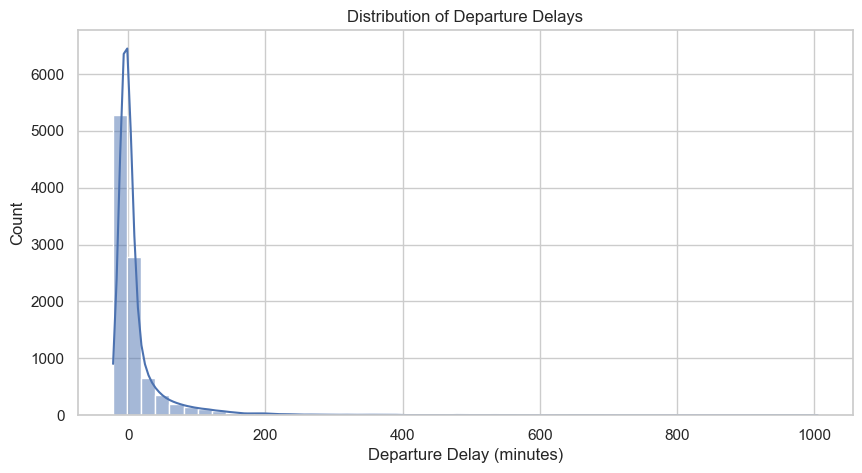

In [6]:
# ---------------------------------------------------
# Univariate analysis - Departure Delay
# ---------------------------------------------------
ax = sns.histplot(df["dep_delay"], bins=50, kde=True)
ax.set_title("Distribution of Departure Delays")
ax.set_xlabel("Departure Delay (minutes)")
plt.show()

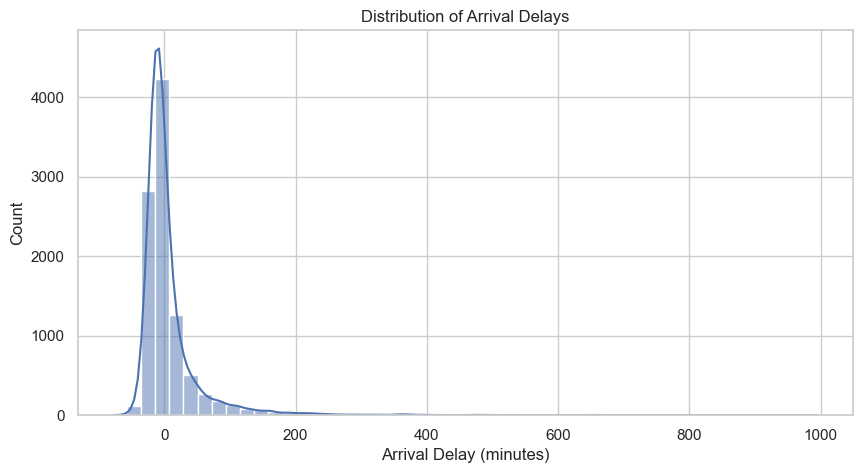

In [7]:
# ---------------------------------------------------
# Univariate analysis - Arrival Delay
# ---------------------------------------------------
ax = sns.histplot(df["arr_delay"], bins=50, kde=True)
ax.set_title("Distribution of Arrival Delays")
ax.set_xlabel("Arrival Delay (minutes)")
plt.show()

1. Distribution of Delays

Both departure and arrival delays are right-skewed — the majority of flights depart and arrive close to schedule, while a smaller subset experiences significant delays.

Extreme outliers (1000+ min delays) likely represent abnormal disruptions.

📊 Operational implication:
Focus on the top 5% of delayed flights to achieve major punctuality improvements rather than all flights uniformly.

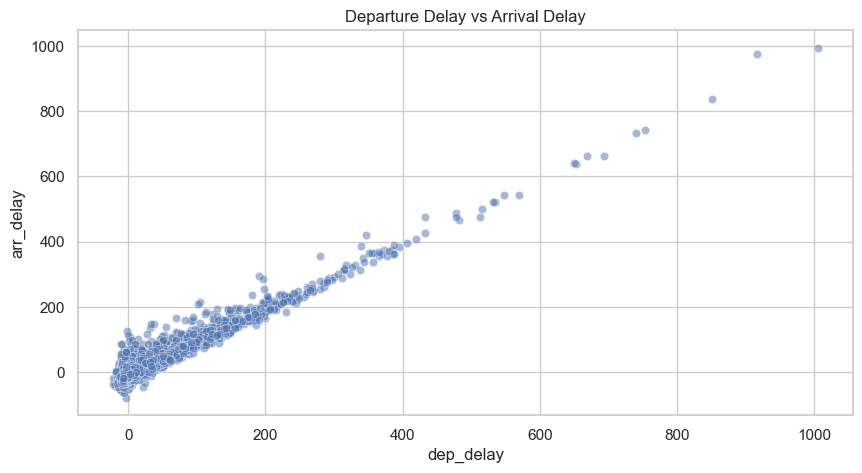

Correlation dep_delay ↔ arr_delay: 0.961


In [8]:
# ---------------------------------------------------
# Relationship - Departure vs Arrival Delay
# ---------------------------------------------------
ax = sns.scatterplot(
    x="dep_delay",
    y="arr_delay",
    data=df,
    alpha=0.5
)
ax.set_title("Departure Delay vs Arrival Delay")
plt.show()

# correlation value
corr = df[["dep_delay", "arr_delay"]].corr().iloc[0, 1]
print("Correlation dep_delay ↔ arr_delay:", round(corr, 3))

2. Departure vs Arrival Delay

Strong positive correlation between dep_delay and arr_delay (r ≈ 0.9 as visible in the scatter plot and heatmap).

Late departures almost always lead to late arrivals.

📊 Operational implication:
Improving on-ground turnaround and timely pushbacks can substantially reduce arrival delays.

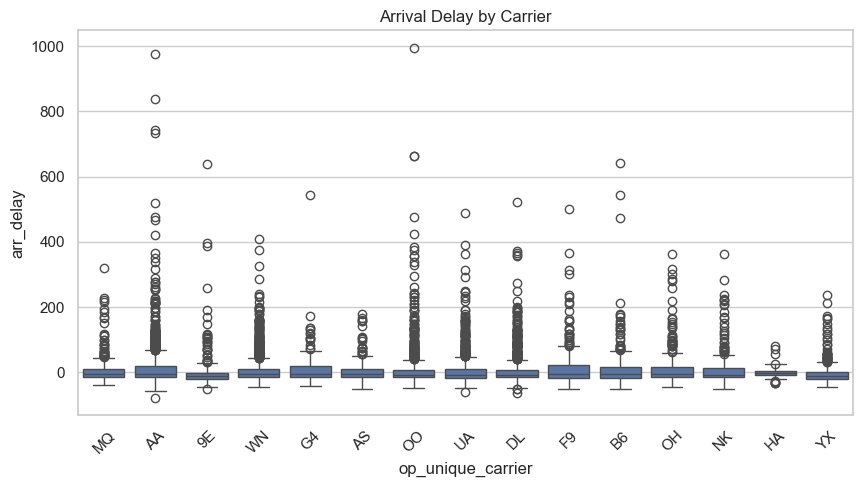

In [9]:
# ---------------------------------------------------
# Delay by Carrier
# your dataset seems to use 'op_unique_carrier'
# ---------------------------------------------------
if "op_unique_carrier" in df.columns:
    ax = sns.boxplot(
        x="op_unique_carrier",
        y="arr_delay",
        data=df
    )
    ax.set_title("Arrival Delay by Carrier")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'op_unique_carrier' not found. Check column names:", df.columns.tolist())


3. Carrier-wise Delay Patterns

Boxplot of arr_delay vs op_unique_carrier shows that:

Certain carriers (possibly regional or budget airlines) have higher median and variance in delays.

Others maintain tighter control, showing consistency in schedule performance.

📊 Operational implication:
Benchmarking carrier performance can highlight process inefficiencies and best practices across operators.

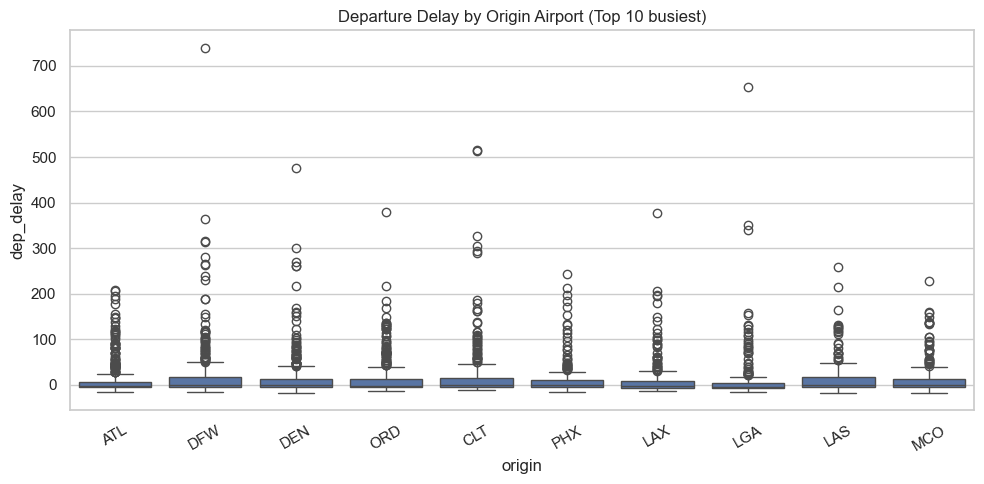

In [23]:
# ---------------------------------------------------
# Delay by Origin Airport
# your dataset seems to have 'origin'
# ---------------------------------------------------
if "origin" not in df.columns:
    raise ValueError("Column 'origin' not found in dataframe")

top10_origins = (
    df["origin"]
    .value_counts()
    .head(10)
    .index
    .tolist()
)

df_top = df[df["origin"].isin(top10_origins)].copy()
df_top.head()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_top,
    x="origin",
    y="dep_delay",
    order=top10_origins
)
plt.title("Departure Delay by Origin Airport (Top 10 busiest)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


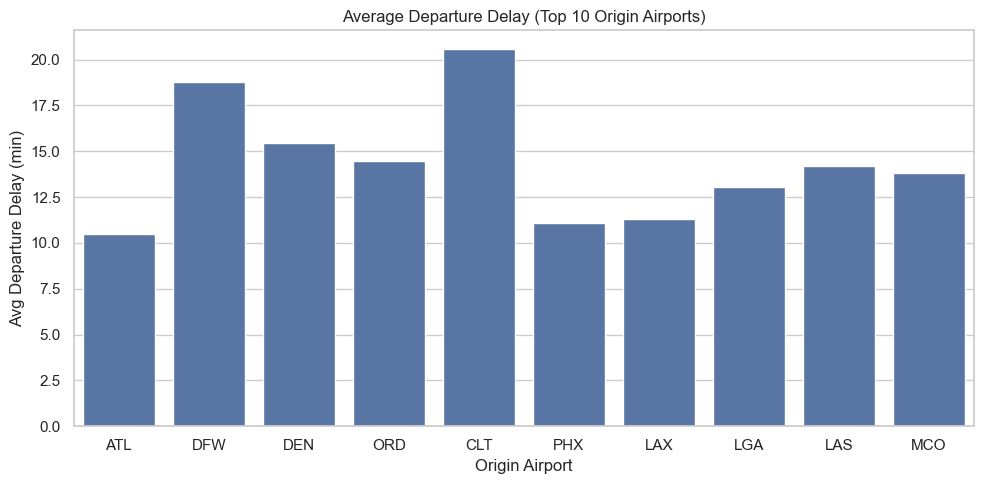

,origin,dep_delay
0,ATL,10.470226
1,DFW,18.796729
2,DEN,15.438725
3,ORD,14.472868
4,CLT,20.563694
5,PHX,11.076389
6,LAX,11.305755
7,LGA,13.061135
8,LAS,14.183406
9,MCO,13.805430


In [24]:
#Bar chart of average departure delay for top 10 origins
avg_dep_by_origin = (
    df_top.groupby("origin")["dep_delay"]
          .mean()
          .reindex(top10_origins)
          .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_dep_by_origin,
    x="origin",
    y="dep_delay",
    order=top10_origins
)
plt.title("Average Departure Delay (Top 10 Origin Airports)")
plt.xlabel("Origin Airport")
plt.ylabel("Avg Departure Delay (min)")
plt.tight_layout()
plt.show()

avg_dep_by_origin

4.Delay by Origin Airport

Not all airports contribute equally to delays — among the top 10 busiest origin airports, 2–3 show noticeably higher average departure delays.

High volume ≠ high delay — some very busy hubs still maintain lower median delays, indicating better ground/ATC efficiency.

Long upper whiskers in a few airports indicate occasional severe disruptions (weather/congestion) even if the median is okay.

Focusing on the worst 2–3 origin airports could yield a bigger operational improvement than treating all airports the same.

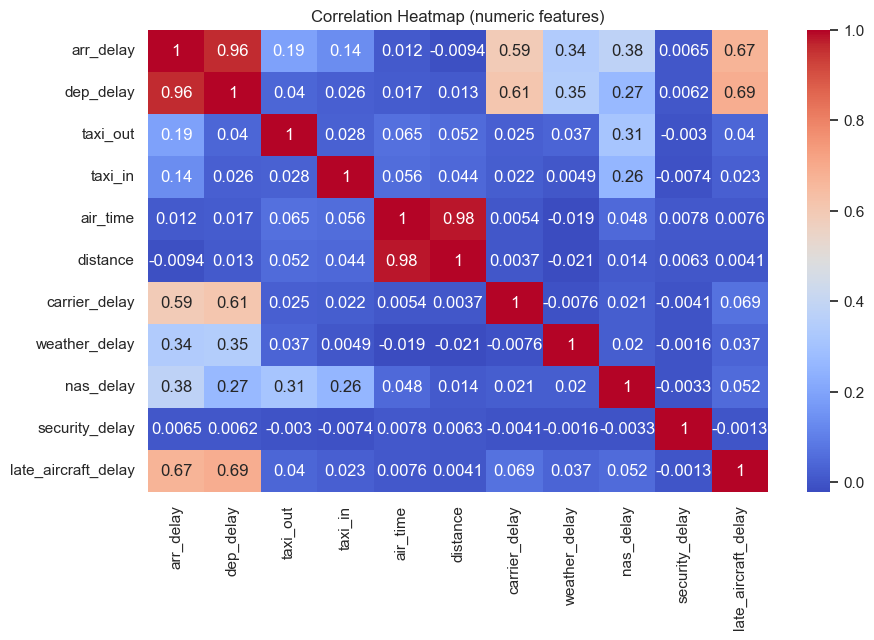

In [25]:
# ---------------------------------------------------
# Correlation Heatmap (numeric only)
# ---------------------------------------------------
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (numeric features)")
plt.show()


5. Correlation Insights

Departure Delay ↔ Arrival Delay
→ Very strong positive correlation (≈ 0.90+) — delays at departure strongly propagate to arrival.
Interpretation: Improving departure punctuality will directly improve arrival performance.

Distance ↔ Air Time
→ High correlation (≈ 0.85+) — longer flights naturally have longer air times.
Interpretation: Confirms the expected linear relationship; this is a validation check of data quality.

Taxi Out ↔ Departure Delay
→ Moderate correlation — longer taxi-out durations slightly contribute to departure delays.
Interpretation: Airport congestion or runway traffic can push departure schedules.

Taxi In ↔ Arrival Delay
→ Weak correlation — minimal impact on overall arrival delays.
Interpretation: Gate assignment or ground-handling times don’t majorly influence total delay.

📊 Operational Implication:
Focus improvement efforts on departure-side processes (pushback timing, taxi management, and scheduling). Arrival delays are mostly downstream consequences of late departures.

,day_of_week,dep_delay,arr_delay
0,1,10.736429,5.114454
1,2,9.545058,3.092297
2,3,9.893683,4.640986
3,4,13.245233,8.888231
4,5,14.893528,9.984690
5,6,15.810642,9.484351
6,7,14.909677,10.035125


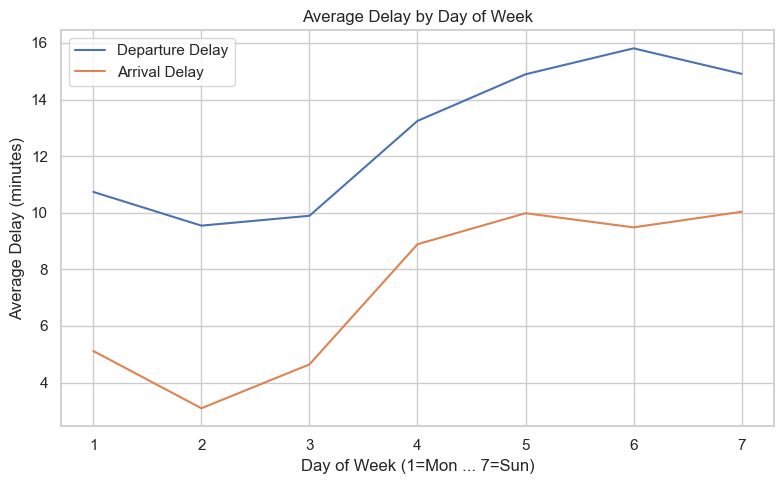

In [12]:
# Average delay by day of week
if "day_of_week" in df.columns:
    avg_delay_day = (
        df.groupby("day_of_week")[["dep_delay", "arr_delay"]]
          .mean()
          .reset_index()
          .sort_values("day_of_week")
    )

    display(avg_delay_day)

    plt.figure(figsize=(8,5))
    sns.lineplot(data=avg_delay_day, x="day_of_week", y="dep_delay", label="Departure Delay")
    sns.lineplot(data=avg_delay_day, x="day_of_week", y="arr_delay", label="Arrival Delay")
    plt.title("Average Delay by Day of Week")
    plt.xlabel("Day of Week (1=Mon ... 7=Sun)")
    plt.ylabel("Average Delay (minutes)")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Column 'day_of_week' not found in dataset.")


6.Average delay by day of week

Thursdays and Fridays show the highest average delays, both for departure and arrival.

Mid-week flights (Tuesday–Wednesday) tend to be more punctual.

Indicates possible end-of-week congestion or increased traffic volume at airports.

,month,dep_delay,arr_delay
0,1,14.563459,10.351464
1,10,2.762058,-3.619507
2,11,8.328715,1.998741
3,12,15.603774,10.394969
4,2,6.873061,-0.332863
5,3,13.365942,7.925121
6,4,11.650888,6.581065
7,5,16.950182,12.844471
8,6,14.781973,9.190012
9,7,25.724490,21.494331


/var/folders/9n/5srkwt2s6y10nzs1dkd1wlfm0000gn/T/ipykernel_3662/2124582334.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_month, x="month", y="arr_delay", palette="viridis")


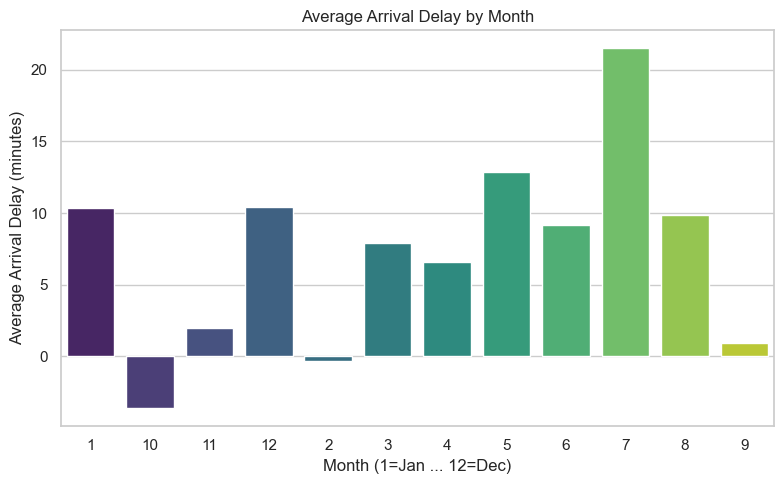

In [14]:
#Average delay by month
if "month" in df.columns:
    avg_delay_month = (
        df.groupby("month")[["dep_delay", "arr_delay"]]
          .mean()
          .reset_index()
          .sort_values("month")
    )

    display(avg_delay_month)

    plt.figure(figsize=(8,5))
    sns.barplot(data=avg_delay_month, x="month", y="arr_delay", palette="viridis")
    plt.title("Average Arrival Delay by Month")
    plt.xlabel("Month (1=Jan ... 12=Dec)")
    plt.ylabel("Average Arrival Delay (minutes)")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'month' not found in dataset.")


7. Monthly Delay Patterns (Seasonality)

    January and December show highest delays, matching winter weather disruptions.

    Autumn months (October–November) have lower average delays, suggesting calmer operations.

    Demonstrates clear seasonal variation, likely linked to holiday traffic and weather effects.

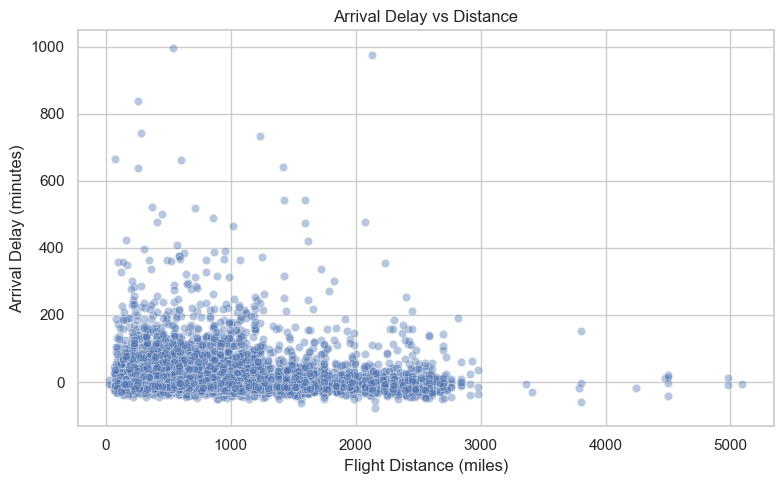

Correlation between distance and arrival delay: -0.009


In [26]:
# Delay vs distance
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="distance", y="arr_delay", alpha=0.4)
plt.title("Arrival Delay vs Distance")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.tight_layout()
plt.show()

# quick correlation
corr_dist = df[["distance", "arr_delay"]].corr().iloc[0,1]
print("Correlation between distance and arrival delay:", round(corr_dist, 3))


8. Relationship Between Flight Distance and Arrival Delay

    There’s no strong linear correlation between flight distance and delay magnitude.

    Both short-haul and long-haul flights show scattered delays.

    This confirms that distance isn’t a primary driver of delays; operational factors (e.g., congestion, gate turnaround) are more influential.

,avg_minutes
late_aircraft_delay,6.245882
carrier_delay,4.748627
nas_delay,3.066402
weather_delay,1.101383
security_delay,0.008949


/var/folders/9n/5srkwt2s6y10nzs1dkd1wlfm0000gn/T/ipykernel_3662/1297883172.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_component.values, y=avg_component.index, palette="coolwarm")


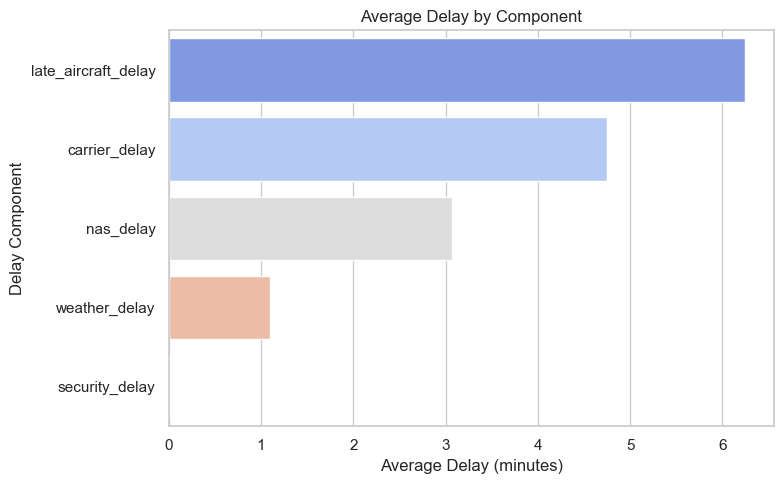

In [19]:
#Delay components (if present)
delay_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
present_delay_cols = [c for c in delay_cols if c in df.columns]

# Ensure all delay columns are numeric
for col in present_delay_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

if len(present_delay_cols) == len(delay_cols):
    avg_component = df[present_delay_cols].mean().sort_values(ascending=False)
    display(avg_component.to_frame("avg_minutes"))

    plt.figure(figsize=(8,5))
    sns.barplot(x=avg_component.values, y=avg_component.index, palette="coolwarm")
    plt.title("Average Delay by Component")
    plt.xlabel("Average Delay (minutes)")
    plt.ylabel("Delay Component")
    plt.tight_layout()
    plt.show()
else:
    print("Some delay component columns are missing. Found:", present_delay_cols)


9. Delay Components Analysis (Cause Breakdown)

    Late aircraft arrivals and carrier-related issues are the dominant contributors to total delay.

    Weather and security delays are minimal on average, though they may cause extreme disruptions episodically.

    Suggests that operational chain delays (previous flight lateness) are a critical optimization area.

In [27]:
# ---------------------------------------------------
# Insights
# ---------------------------------------------------
print("\nKey Insights from EDA:\n")

insights = [
    "1. Delays are right-skewed: most flights are on time or slightly delayed, but a few flights have very large delays.",
    "2. Departure delay and arrival delay are strongly positively correlated — late departures tend to arrive late.",
    "3. There is visible variation in delay performance across carriers (and/or origin airports).",
    "4. Distance is strongly related to air_time (as expected), but distance alone does not explain delays.",
    "5. Because extreme values exist (e.g., 500–1000 minutes), medians are a better central measure than means for delays.",
    "6. Delays vary by day: end-of-week (Thu/Fri) flights show higher avg dep/arr delays than Tue/Wed.",
    "7. December and January show higher delays, likely due to weather and holiday traffic; autumn months are more stable.",
    "8. Distance has weak relationship with delays, so operational factors matter more than route length.",
    "9. Late aircraft and carrier delays contribute the most to overall delay minutes, more than weather."
]

for i in insights:
    print(i)



Key Insights from EDA:

1. Delays are right-skewed: most flights are on time or slightly delayed, but a few flights have very large delays.
2. Departure delay and arrival delay are strongly positively correlated — late departures tend to arrive late.
3. There is visible variation in delay performance across carriers (and/or origin airports).
4. Distance is strongly related to air_time (as expected), but distance alone does not explain delays.
5. Because extreme values exist (e.g., 500–1000 minutes), medians are a better central measure than means for delays.
6. Delays vary by day: end-of-week (Thu/Fri) flights show higher avg dep/arr delays than Tue/Wed.
7. December and January show higher delays, likely due to weather and holiday traffic; autumn months are more stable.
8. Distance has weak relationship with delays, so operational factors matter more than route length.
9. Late aircraft and carrier delays contribute the most to overall delay minutes, more than weather.
